In [11]:
# empirical cdf
# fig 11.17 of 'Bayeysian Modeling and Computation'

from jax import random
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

try:
    import tensorflow_probability.substrates.jax as tfp
except ModuleNotFoundError:
    %pip install --upgrade tensorflow-probability
    import tensorflow_probability.substrates.jax as tfp

try:
    import arviz as az
except ModuleNotFoundError:
    %pip install -qq arviz
    import arviz as az

tfd = tfp.distributions
key = random.PRNGKey(4)

In [21]:
import os

# os.environ['FIG_DIR']='/Users/kpmurphy/github/bookv2/figures'
# os.environ['LATEXIFY']='1'

In [22]:
latexify(fig_height=4.5)

saving image to /Users/kpmurphy/github/bookv2/figures/ecdf_sample_latexified.pdf
Figure size: [6.  4.5]


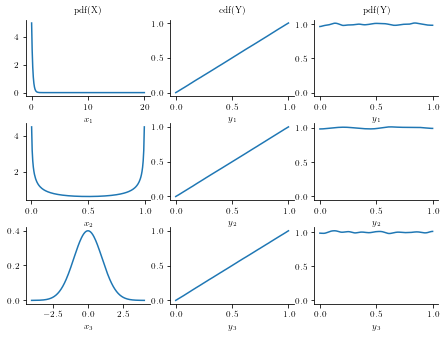

In [23]:
keys = random.split(key, num=3)

# inputs
xs = (jnp.linspace(0, 20, 200), jnp.linspace(0, 1, 200), jnp.linspace(-4, 4, 200))

# distribs
dists = (tfd.Exponential(5), tfd.Beta(0.5, 0.5), tfd.Normal(0, 1))
fig, ax = plt.subplots(
    3,
    3,
)

for idx, (dist, x, seed) in enumerate(zip(dists, xs, keys)):
    draws = dist.sample(100000, seed=seed)
    data = dist.cdf(draws)
    ax[idx, 0].plot(x, dist.prob(x))
    ax[idx, 0].set_xlabel(f"$x_{idx+1}$")
    # ax[idx, 0].set_ylabel(f"$P(x_{idx+1})$")

    ax[idx, 1].plot(jnp.sort(data), jnp.linspace(0, 1, len(data)))
    ax[idx, 1].set_xlabel(f"$y_{idx+1}$")
    # ax[idx, 1].set_ylabel(f"$x_{idx+1}$")

    az.plot_kde(data, ax=ax[idx, 2])
    ax[idx, 2].set_xlabel(f"$y_{idx+1}$")
    # ax[idx, 2].set_ylabel(f"$P(y_{idx+1})$")

    if idx == 0:
        ax[idx, 0].set_title("pdf(X)")
        ax[idx, 1].set_title("cdf(Y)")
        ax[idx, 2].set_title("pdf(Y)")

sns.despine()
plt.tight_layout()
savefig("ecdf_sample")
plt.show()

In [9]:
latexify(width_scale_factor=3, fig_height=1.5)

/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


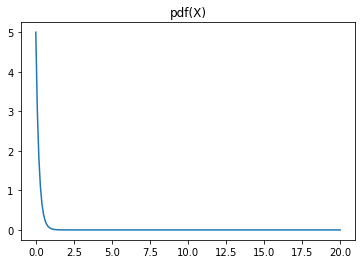

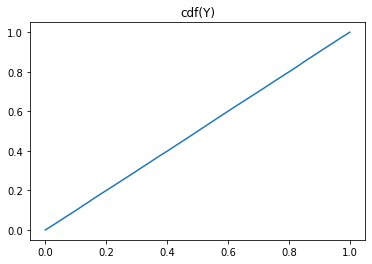

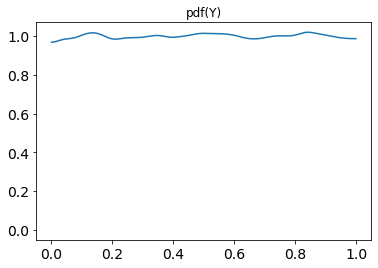

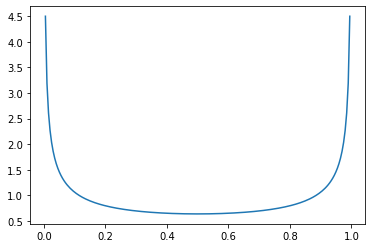

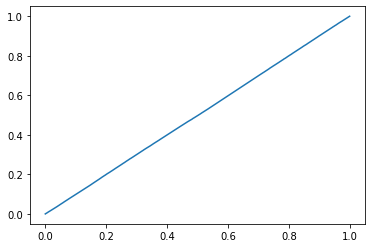

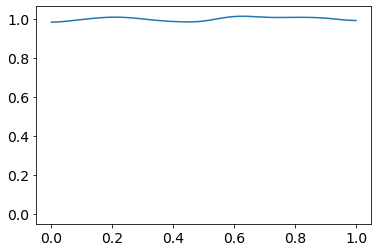

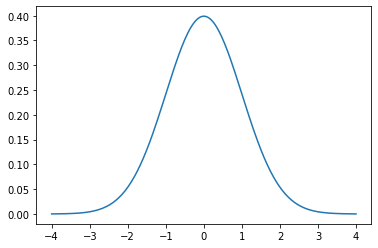

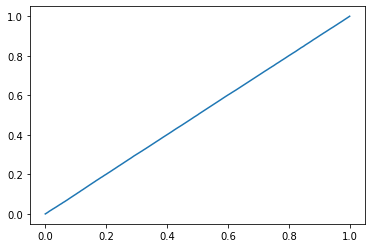

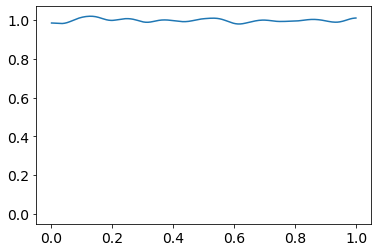

In [10]:
for idx, (dist, x, seed) in enumerate(zip(dists, xs, keys)):
    draws = dist.sample(100000, seed=seed)
    data = dist.cdf(draws)
    plt.figure()
    plt.plot(x, dist.prob(x))
    if idx == 0:
        plt.title("pdf(X)")
    # savefig(f"ecdf_{idx}_pdfX", dpi=300)

    plt.figure()
    plt.plot(jnp.sort(data), jnp.linspace(0, 1, len(data)))
    if idx == 0:
        plt.title("cdf(Y)")
    # savefig(f"ecdf_{idx}_cdfY", dpi=300)

    fig, ax = plt.subplots()
    az.plot_kde(data, ax=ax)
    if idx == 0:
        plt.title("pdf(Y)")
    # savefig(f"ecdf_{idx}_pdfY", dpi=300)